
# <span style="color:rgb(213,80,0)">**Heat transfer in a 2D plate**.</span>
<p style="text-align:left">
   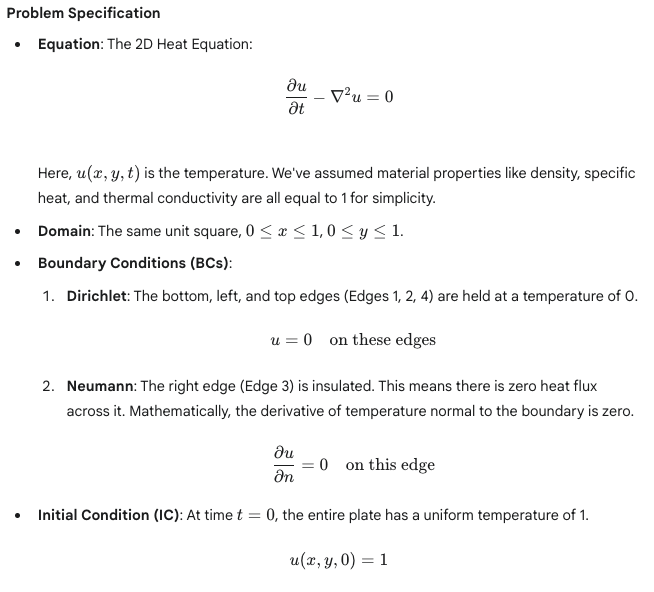
</p>


In [1]:
clc; clearvars; close all;


createpde(1) means that our PDE has only 1 dependent varaible \- u



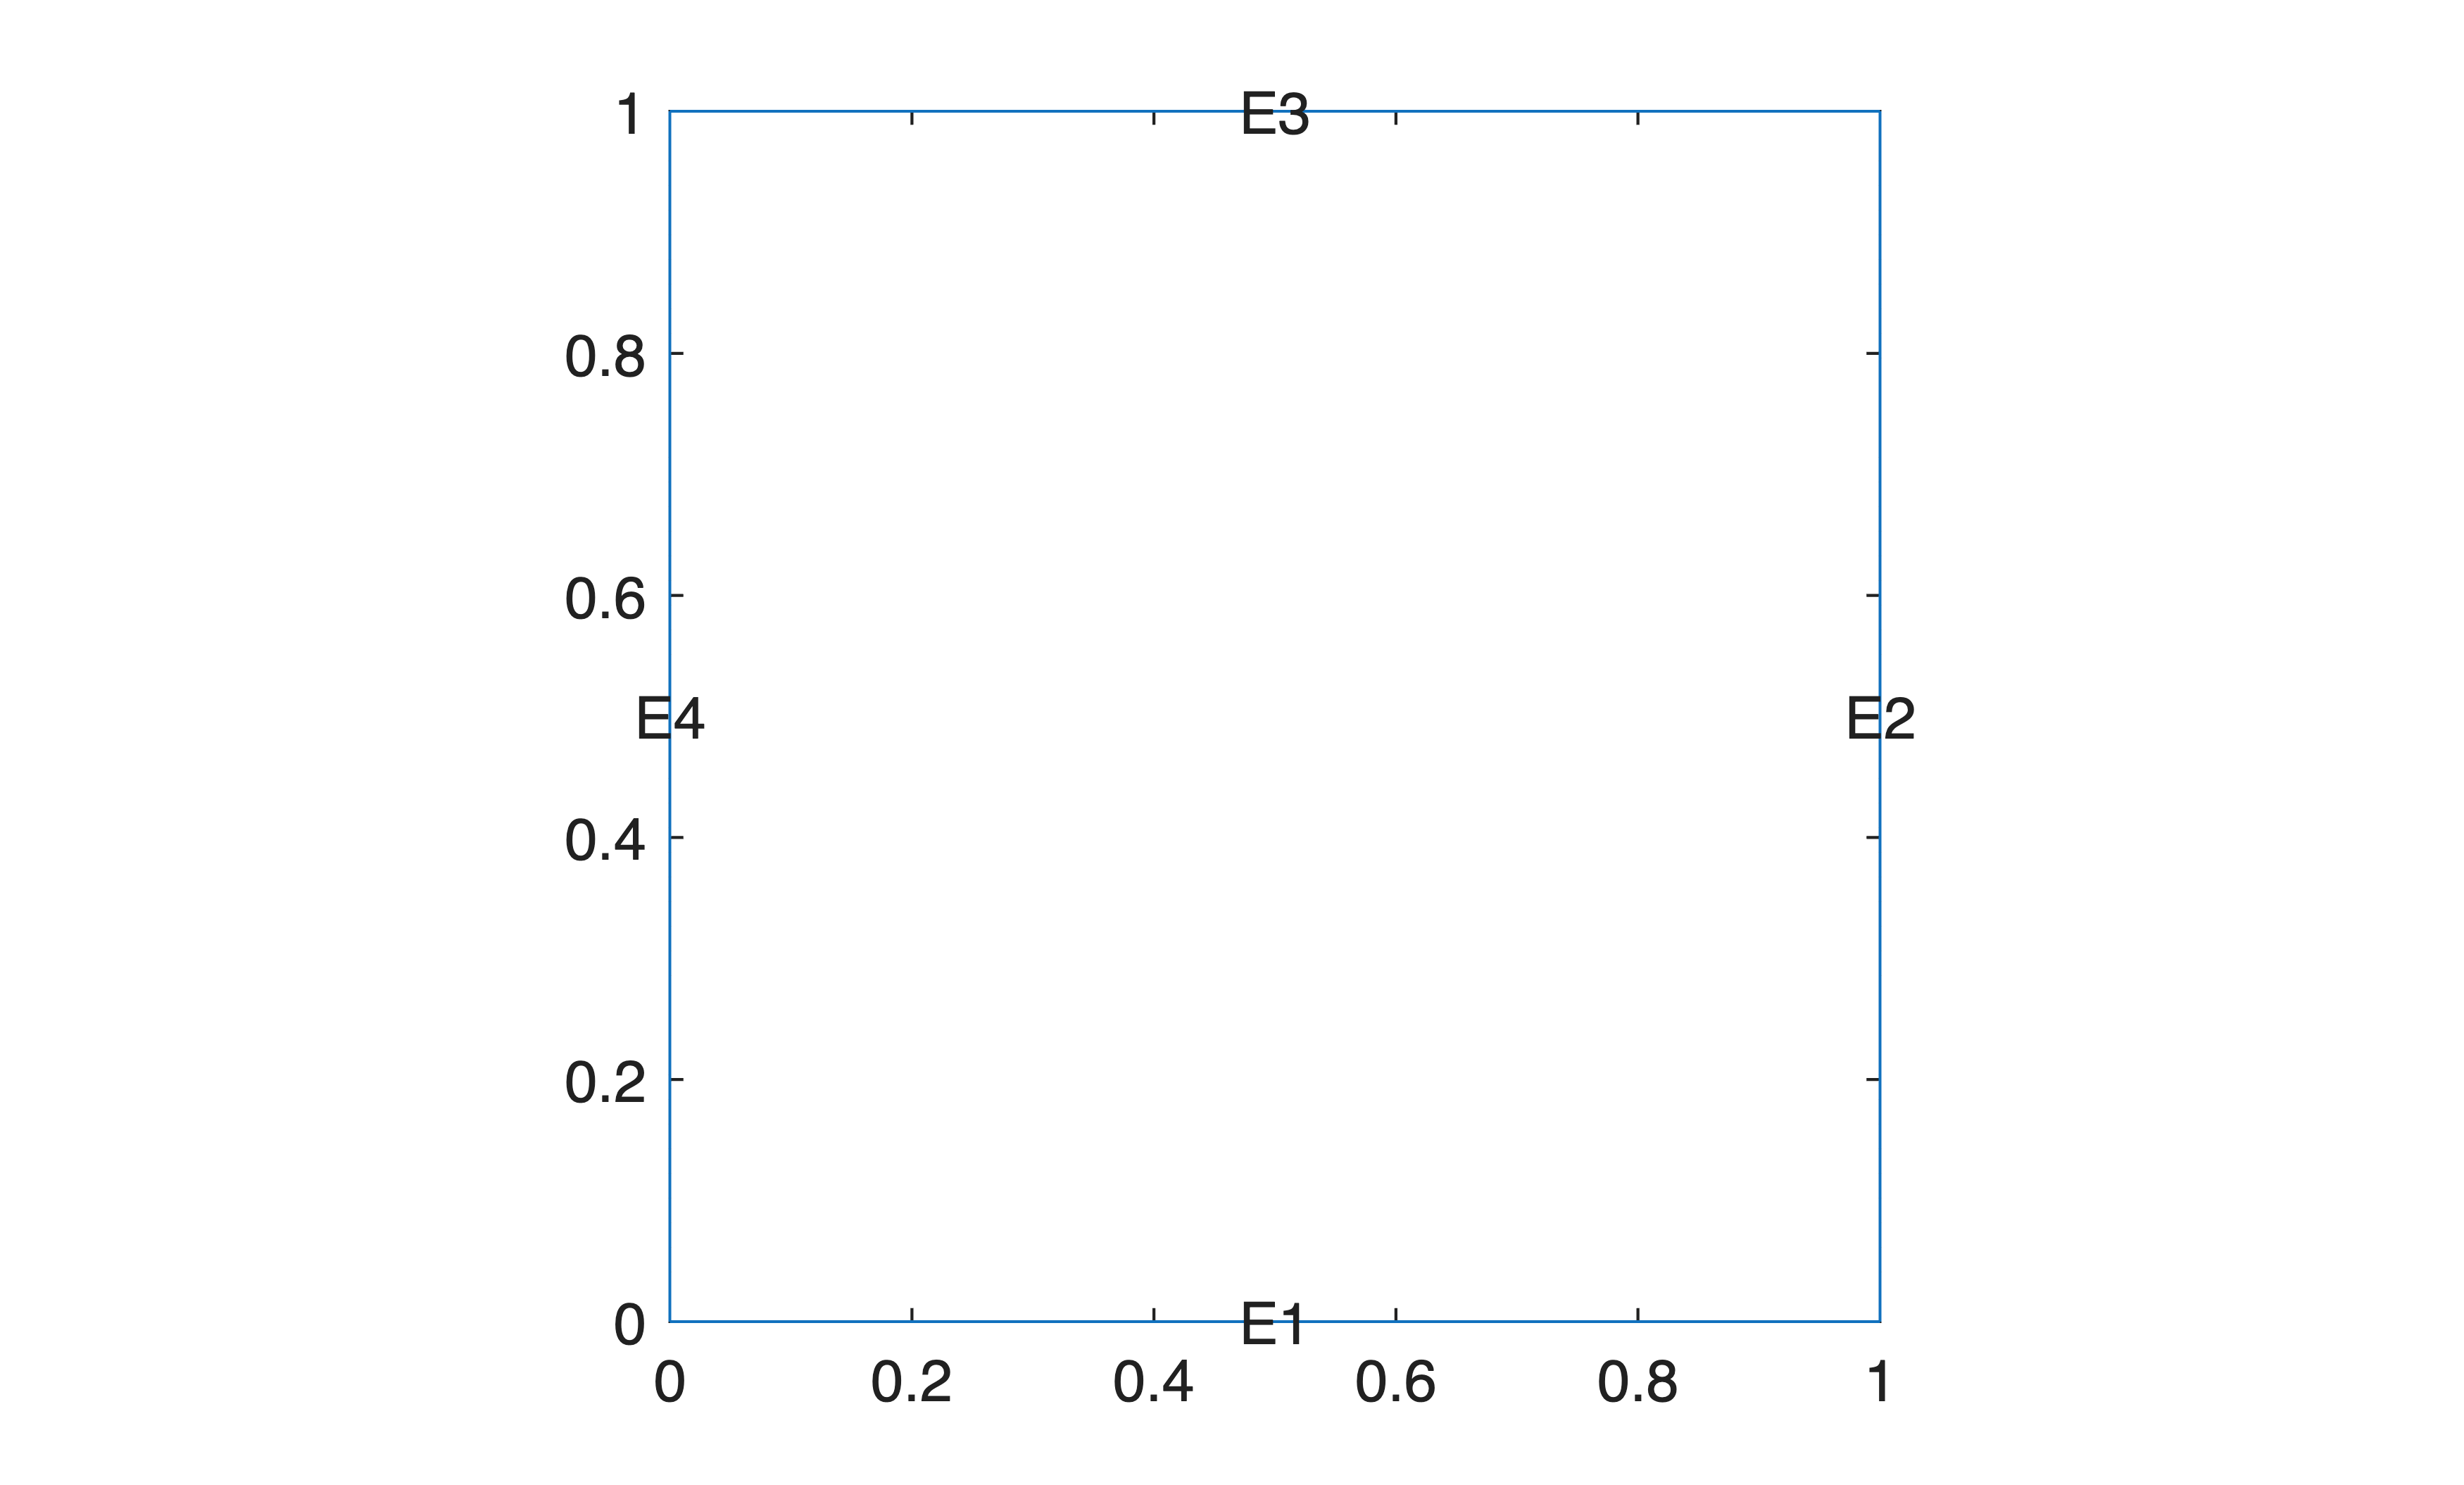

In [2]:
model = createpde(1);

R1 = [3; 4; 0; 1; 1; 0; 0; 0; 1; 1];
geometryFromEdges(model,decsg(R1));

figure();
pdegplot(model,"EdgeLabels","on");

In [3]:
specifyCoefficients(model,'m',0,'d',1,'c',1,'a',0,'f',0);

applyBoundaryCondition(model,"dirichlet","Edge",[1,3,4],"u",0);


For Neumann boundary conditions, the flux = 0. Flux is represented by g option


In [4]:
applyBoundaryCondition(model,"neumann", "Edge",2,"g",0); % g -> flux


To set initial conditions, at t = 0, we use this method:


In [5]:
setInitialConditions(model, 1); % 1 here means that the value of u(t=0) = 1


Then provide a list of timesteps where you want to solve the PDE.



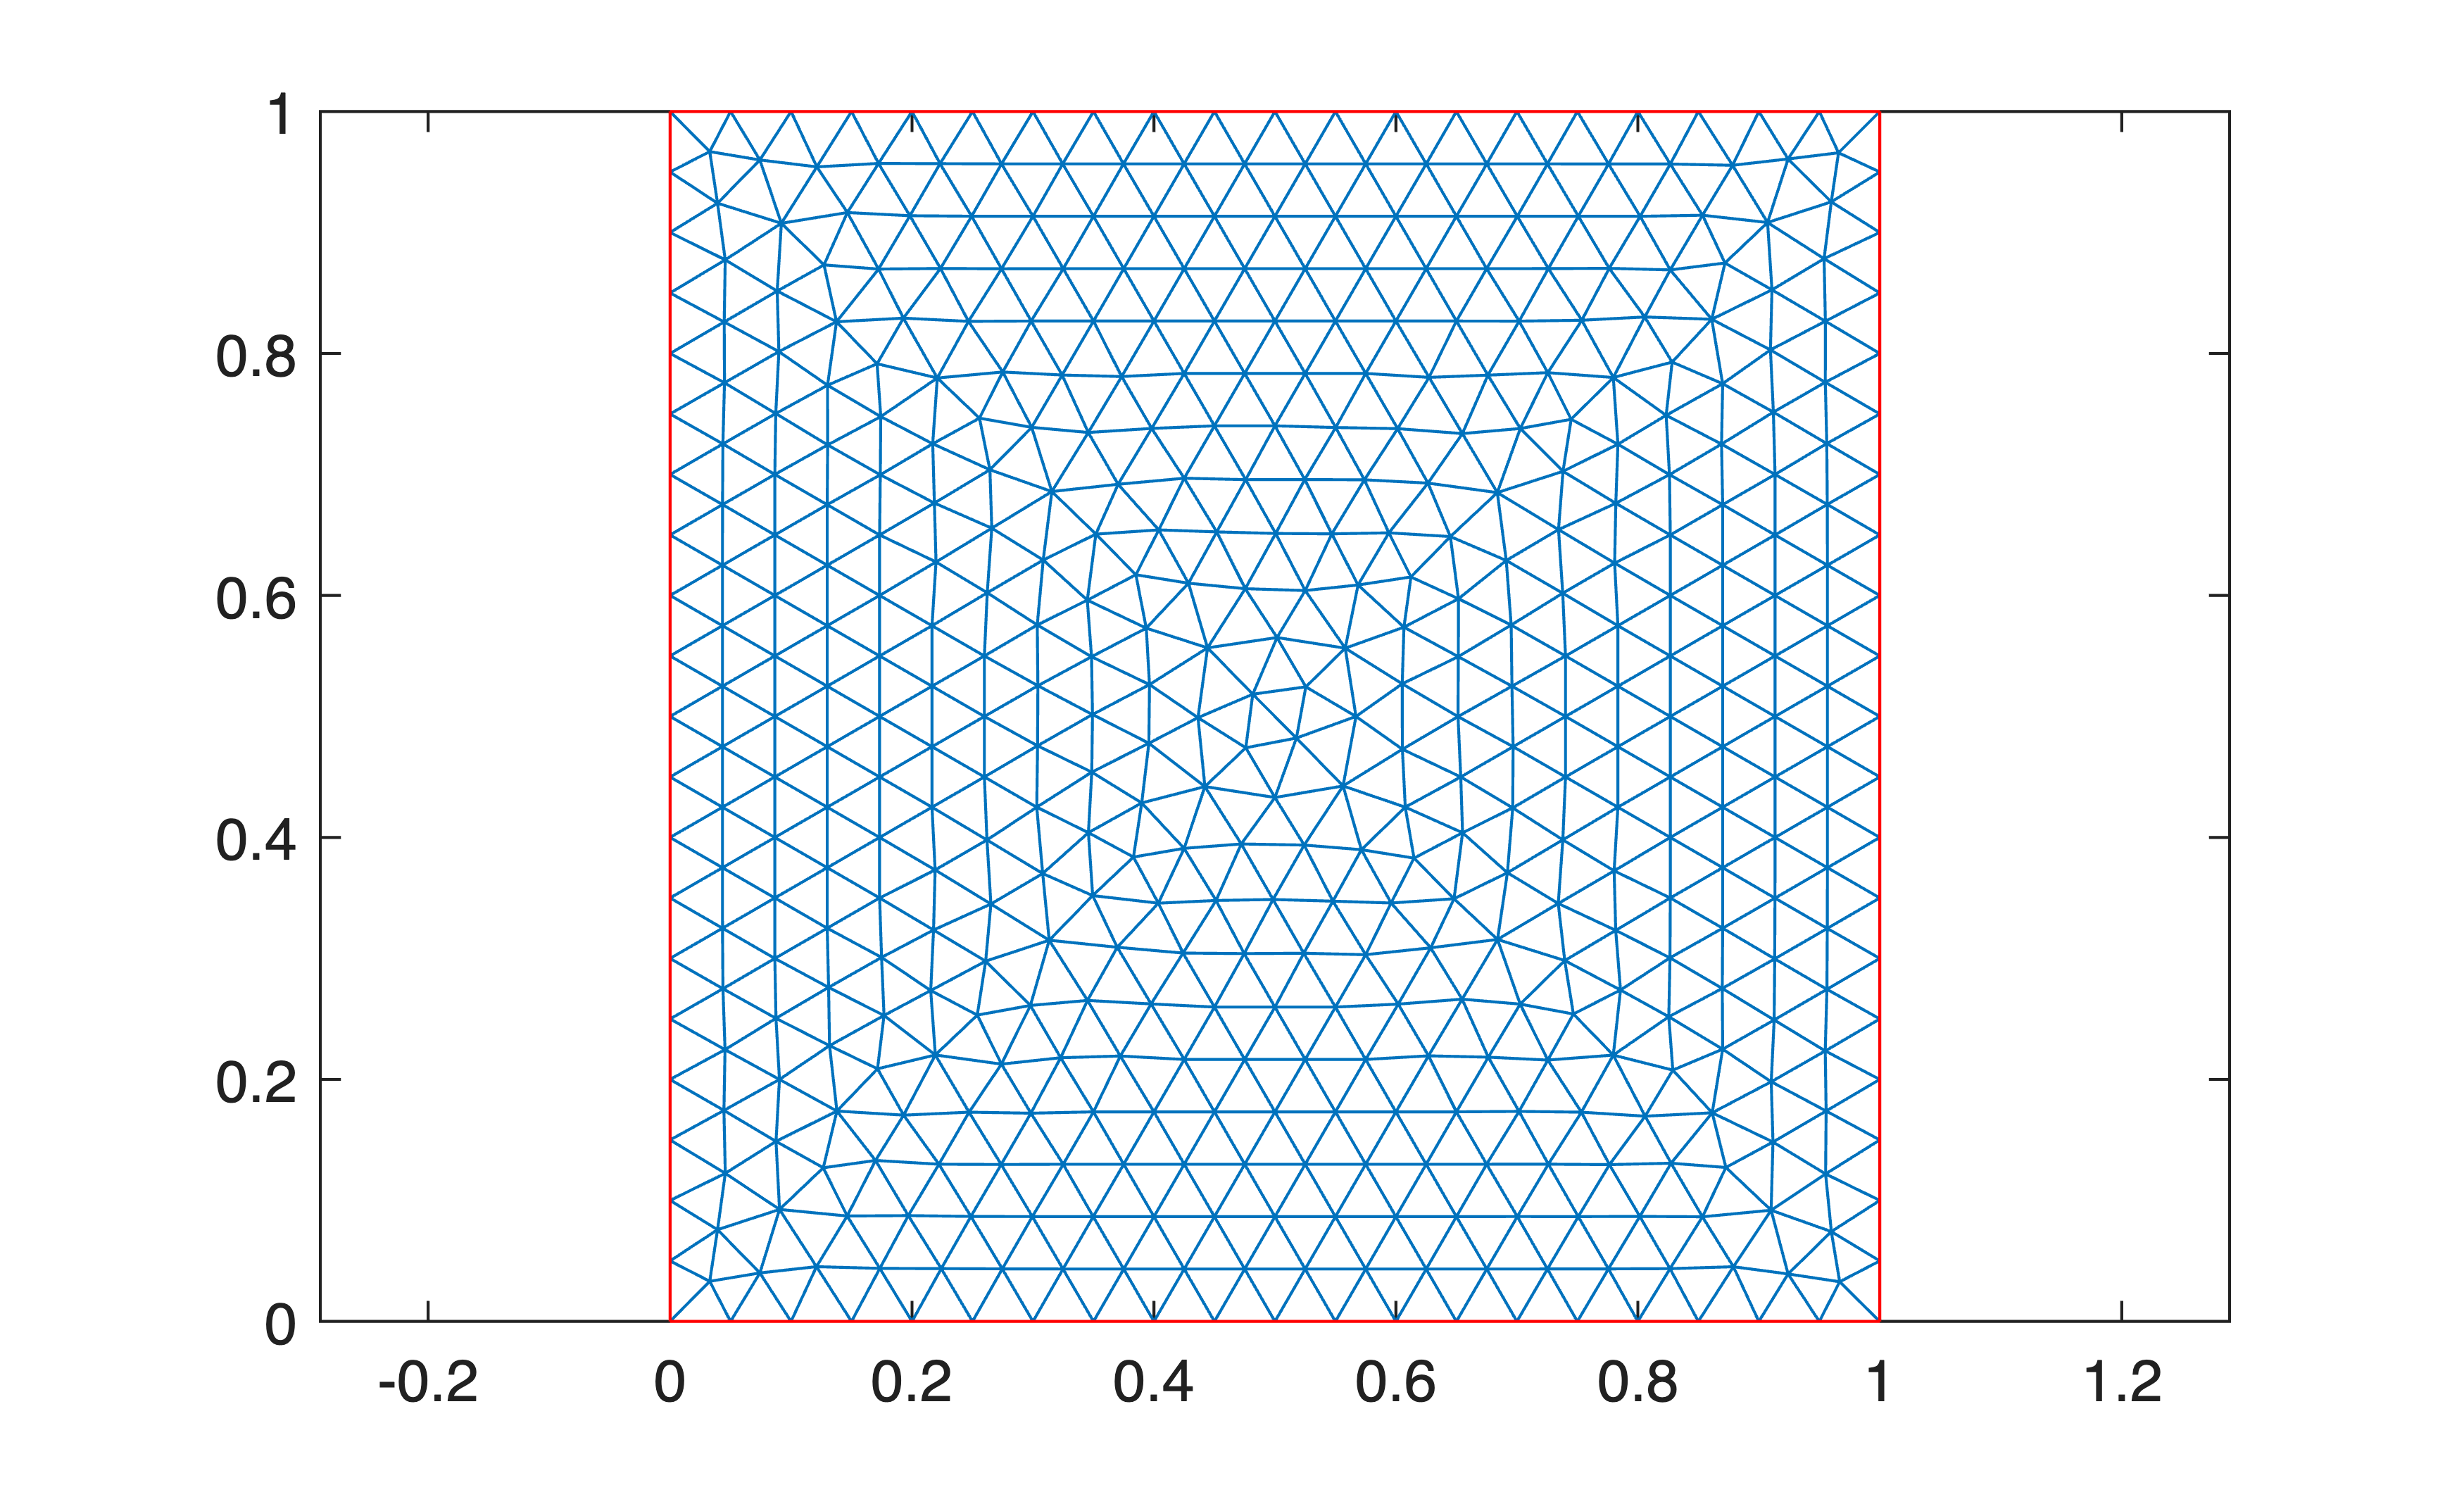

In [6]:
tlist = 0:0.01:0.3;

generateMesh(model, 'Hmax', 0.05);
pdemesh(model);


While solving the PDE, specify the timesteps variable.


In [7]:
results = solvepde(model, tlist);
u = results.NodalSolution;


To plot an animation of time, use a for loop to iterate through the u matrix.



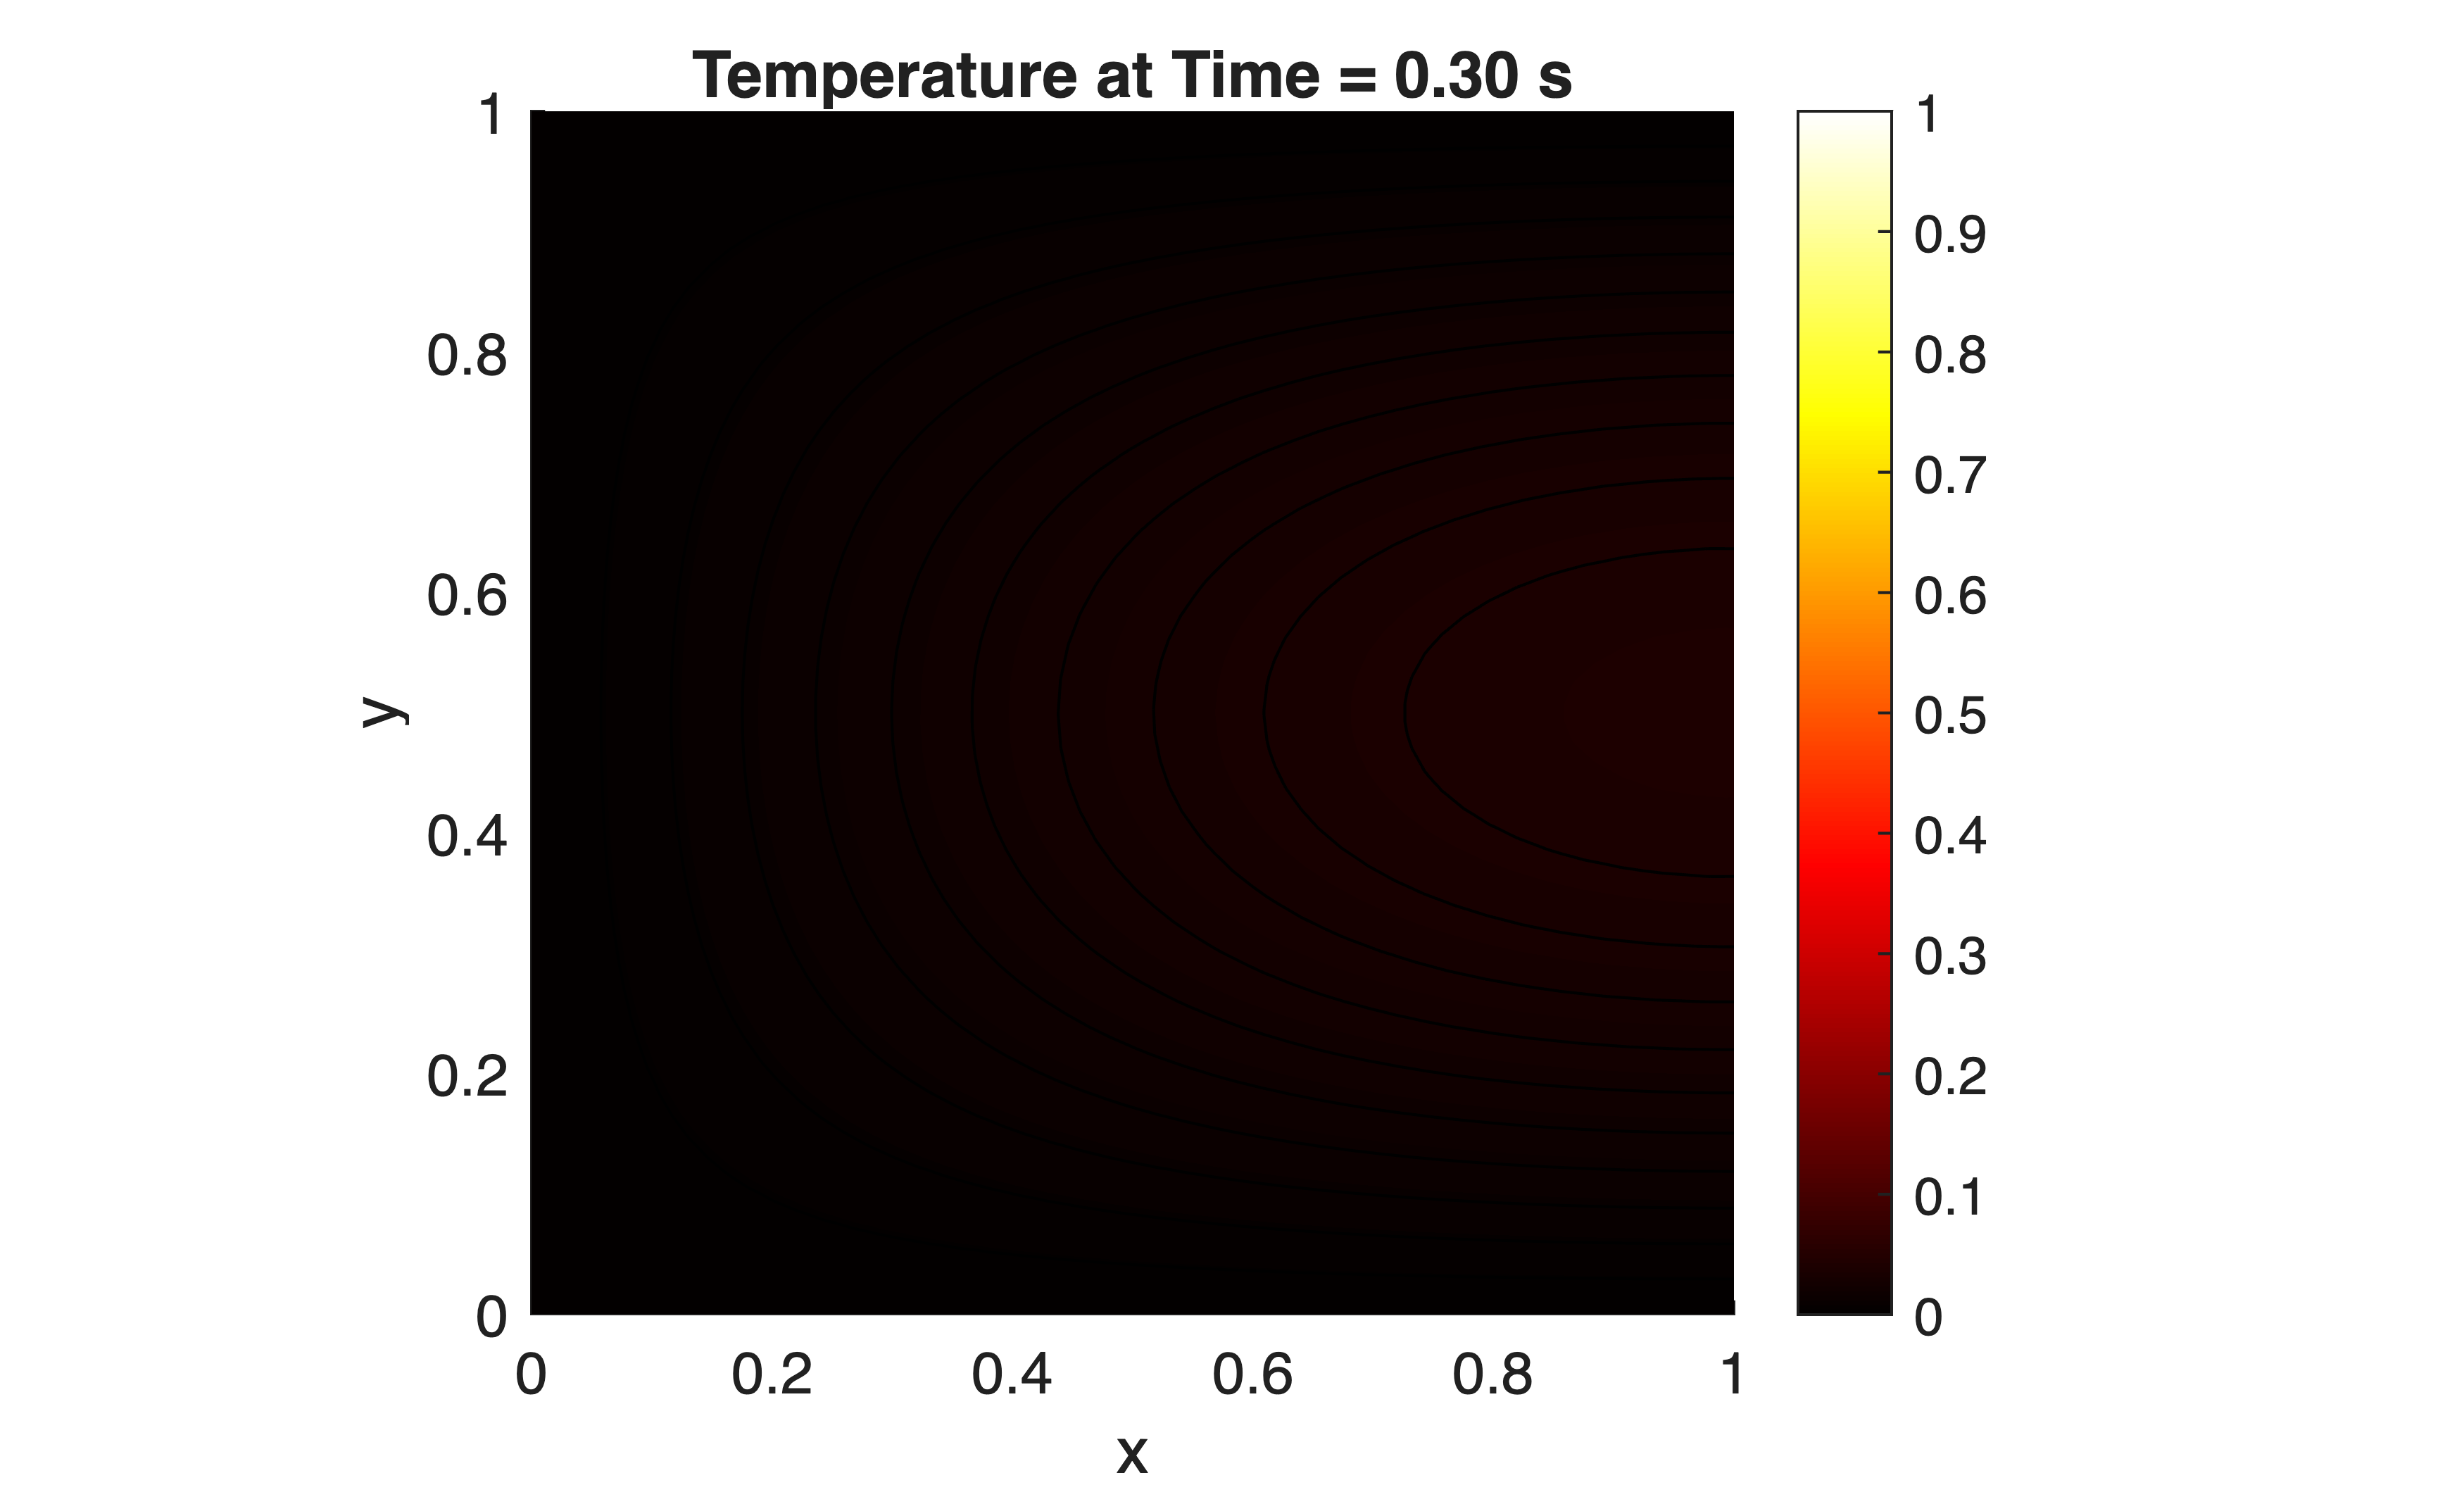

In [8]:
figure();
for i = 1:length(tlist)
    % Plot the solution at the i-th time step
    pdeplot(model, 'XYData', u(:,i), 'Contour', 'on', 'ColorMap', 'hot');

    title(['Temperature at Time = ', num2str(tlist(i), '%.2f'), ' s']);
    xlabel('x');
    ylabel('y');
    axis equal tight;

    % Keep the color axis consistent for the whole animation
    clim([0 1]);

    drawnow; % Force MATLAB to draw the plot
    pause(0.1); % Pause to make the animation watchable
end